In [1]:
# python version: python3

In [2]:
import pandas as pd
import numpy as np

## DATA PREPARATION

### Split data into X and Y:

"price" column is out dataset target. We create two pandas data frames using train.csv, one containing all the input features and the other containing the target label only. Name these data frames as train_x_a and train_y respectively.

In [3]:
first_df = pd.read_csv('training.csv') #Read Train data

train_x_a = first_df.drop('price', axis=1) #Get features
train_y = first_df['price'] #Get Target

In [4]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [5]:
train_y.head(2)

0    15985.0
1     7349.0
Name: price, dtype: float64

### Handling missing values:

Firstly,  we find all features (columns) that contain missing (NaN) values and store these column names in a list called nan_columns. We fill the missing values with the median value of the corresponding feature. We save our resulting data frame as train_x_b.

In [6]:
nan_columns = list(first_df.columns[first_df.isna().any()]) #Get Null Columns

train_x_a_median = train_x_a.median() #Store as variable to fill test data later

train_x_b = train_x_a.fillna(train_x_a_median)

In [7]:
print(nan_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [8]:
# Dropping nulls from price

price_null_index = train_y[train_y.isnull()].index
train_x_b.drop(price_null_index, inplace=True)
train_y.drop(price_null_index, inplace=True)

In [9]:
train_x_b.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,3.31,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


### Handling categorical variables:

We find all features (columns) that contain categorical values (strings). After that we store these column names in a list called categorical_columns.

In [10]:
categorical_columns = list(train_x_b.columns[train_x_b.dtypes == 'object']) #Find any columns with type 'object', represeting a string

In [11]:
print(categorical_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### One hot encoding:

We perform one hot encoding on features with categorical values. After, we modify train_x_b by replacing categorical columns with their one-hot encoding representations. Modified dataframe's name is  train_x_d . (For example, if you have a column named “gender” that has two unique values (male and female), after one-hot encoding, gender column will be replaced with two new columns in the dataframe, one column for male and one column for female. Your new dataframe will have 1 in the female column and 0 in the male column.)

In [12]:
train_x_d = pd.get_dummies(train_x_b)

In [13]:
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,104.3,188.8,67.2,56.2,2410.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,0,0,1,0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,0,1,0,0,0,0,0


### Standard scaling:

Scale all columns in train_x_d with standardization. Name the new dataframe with scaled values as train_x_e.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#Get all coninous variable columns
continuous_columns = [i for i in train_x_b if i not in categorical_columns]



sc = StandardScaler()
sc.fit(train_x_d[continuous_columns])# Only fit the scaler, not fit_transform. This is so we can use the same scaler for the test data.
train_x_e = train_x_d.copy()
train_x_e[continuous_columns] = sc.transform(train_x_d[continuous_columns])

In [16]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,0,0,0,0,0,0,0,0,1,0
1,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,0,0,0,0,1,0,0,0,0,0


## DATA EXPLORATION

### Visualize variable distributions:

The histogram of each of the variables in your dataset. Try to understand how each
variable is distributed. Are there any extreme points in these distributions?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024817307E48>,
      dtype=object)

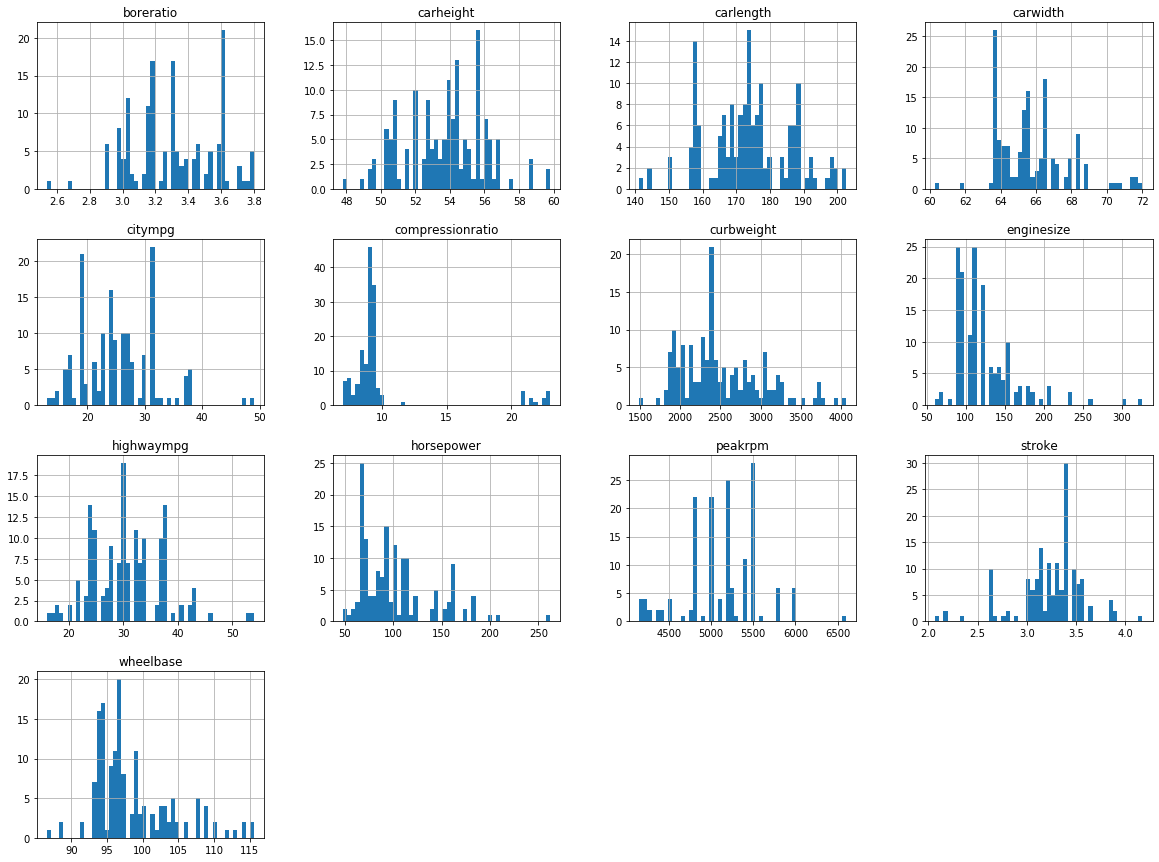

In [18]:
import matplotlib.pyplot as plt
train_x_d[continuous_columns].hist(bins=50, figsize=(20,15))

### Calculate correlation:

Calculation of the correlation score between all continuous variables in dataset and the target. We get the strongest 5 correlating variables (top 5 absolute correlations) and store the names in a list called top_5_corr.

In [19]:

combined = pd.concat([train_y, train_x_d[continuous_columns]], axis=1) #Combine into one dataframe to use corr(), alternative method is to use .corrwith()
corrleated_df = combined.corr().abs()
top_5_corr = list(corrleated_df['price'].index[1:6]) #Get from 1 to 6 because the first item will be the same feature; price

In [20]:
print(top_5_corr)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight']


### Scatter plot:

Plot each of the 5 variables you found in the previous against each other.

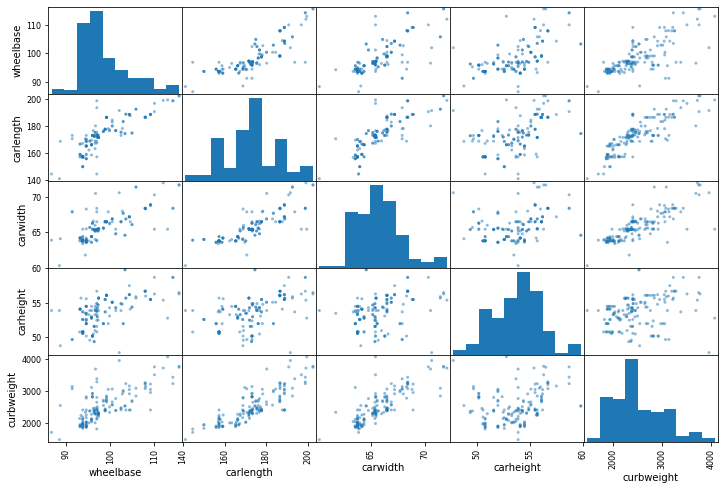

In [21]:
from pandas.plotting import scatter_matrix


sm = scatter_matrix(train_x_d[top_5_corr], figsize=(12, 8))

## LINEAR REGRESSION TO PREDICT CAR PRICES

In this part, we are going to train a Linear Regression model that predicts the prices of cars by using the other features in the dataset. When refered to retrieve the MSE score from cross_val_score or GridSearchCV, set the scoring option to ‘neg_mean_square_error’. This will return a negative error. To obtain MSE, get the absolute value.

### Create a model:

A Linear Regression model with default parameters. Train the model withtrain_x_e and train_y. Print the Mean Square Error (MSE) for training data.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
lr_model = LinearRegression() #Create model and fit
lr_model.fit(train_x_e, train_y)

train_pred = lr_model.predict(train_x_e) #Predict on training data nad calculate train MSE.
mse = mean_squared_error(train_y, train_pred)
print(mse)

4292176.310954015


### Validation our model:

5-fold cross validation with training data and print MSE score for each fold and their average (mean)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:

cv_lr_model = LinearRegression()
train_mse_score = -cross_val_score(cv_lr_model, train_x_e, train_y, cv=5, scoring='neg_mean_squared_error')
print(train_mse_score) # Get the negative of the result to get MSE.

[10015494.68044823  6661165.84773793  8006907.89379292 11491954.93856969
  7177366.78896613]


In [32]:
average_mse = sum(train_mse_score) / len(train_mse_score) #Get Mean MSE
print(average_mse)

8670578.02990298


### Test our model:

Using test.csv, create test_x that has all the features except our target “price” and test_y that has only “price”. We are are going to fill missing values in test_x with median value, perform feature scaling and apply one hot encoding to categorical values.

In [33]:
test_df = pd.read_csv('test.csv')

test_x = test_df.drop('price', axis=1)
test_y = test_df['price']

In [34]:
# Drop and fill nulls
test_x.fillna(train_x_a_median, inplace=True) #Use train median to fill test data

test_null_index = test_y.index[test_y.isnull()]
test_x.drop(test_null_index, inplace=True)
test_y.drop(test_null_index, inplace=True)


In [35]:
#One Hot Encoding
test_x = pd.get_dummies(test_x)

In [36]:
#Scaling
test_x[continuous_columns] = sc.transform(test_x[continuous_columns])# Use already an already fitted standard scaler from training data.

In [37]:
test_x.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.311385,1.529613,2.799691,0.885315,0.874435,0.301750,-0.471250,0.473955,-0.384726,0.204338,...,0,0,0,0,0,0,0,0,1,0
1,-0.368190,0.148909,-1.654180,0.177976,-0.279379,-0.352393,-0.628165,1.029791,-0.250249,-0.447582,...,0,0,0,1,0,0,0,0,0,0


In [38]:
test_y.head(2)

0    18920.0
1    10295.0
Name: price, dtype: float64

### Predict on test set:

We are going to predict the prices of cars in test_x data using your linear regression model that we created. After that we store the predicted values in a variable named predicted_values . Print the test set MSE of your model. Also, print our model’s coefficients.

In [39]:
predicted_values = lr_model.predict(test_x) # Predict using model created before.

In [40]:
print(predicted_values[10:13])

[25821.12836367 15266.89217591  7234.96462755]


In [41]:
test_mse_score = mean_squared_error(test_y, predicted_values) #Get MSE between actuals and predicted.
print(test_mse_score)

14477088.744741658


### Polynomial Features:

Some of the features within the dataset may have a polynomial relation with the target. In order to account for this, run a polynomial transformation with degree 2 on train_x_e and store the result in a variable called train_x_m. Create a Linear Regression model with default parameters and perform 5-fold cross validation using train_x_m and train_y . Print the average MSE score.

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [43]:
poly_array = poly.fit_transform(train_x_e) # PolynomialFeatures transforming returns an array so it has be formed into a DataFrame.
train_x_m = pd.DataFrame(poly_array)

In [44]:
train_x_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
0,1.0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
lr_model_poly = LinearRegression()

poly_mse = -cross_val_score(lr_model_poly, train_x_m, train_y, cv=5, scoring='neg_mean_squared_error')

In [46]:
average_mse = sum(poly_mse) / len(poly_mse)
print(average_mse) #Error is much higher than before polynomial transformation, probably due to overfitting.

1.4978374340561018e+29


### Regularization:

Now that many more features are incorporated into the training set, there is a high chance our new model is overfitting the training set. Create a Lasso regularization model with default parameters. Perform 5-fold cross validation using the training data and print the average MSE score.

In [47]:
import warnings
warnings.filterwarnings('ignore')#Ignore Lasso Warnings

In [48]:
from sklearn.linear_model import Lasso

In [49]:
lasso = Lasso()

lasso_mse = -cross_val_score(lasso, train_x_m, train_y, cv=5, scoring='neg_mean_squared_error')

In [50]:
average_mse = sum(lasso_mse) / len(lasso_mse)
print(average_mse) #Error is lower than linear regression model, regularization is improviing our model.

42558399.037558295


### Regularization Curve:

We are going to calculate and store all 5-fold CV MSE scores for alpha values between 1 and 3000 with a step size of 10. Plot the scores as a line graph and print the lowest error and it’s respective alpha.

In [51]:
all_scores = []

for alpha in range(1, 3001, 10): # Go through all alphas from 1 to 3000
    lasso = Lasso(alpha = alpha) #Create new Lasso model
    lasso_mse = -cross_val_score(lasso, train_x_m, train_y, cv=5, scoring='neg_mean_squared_error')
    average_mse = sum(lasso_mse) / len(lasso_mse)
    all_scores.append(average_mse) # Store score

score_series = pd.Series(all_scores, index=range(1, 3001, 10)) # Transform scores in to series

min_error = score_series.min() #Get minimum score
min_alpha = score_series.idxmin() #Get minimum index which represents the alpha

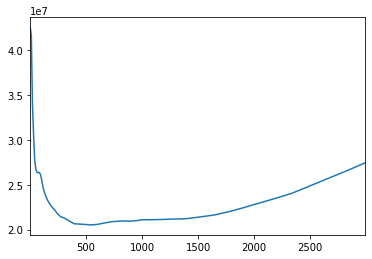

In [52]:
score_series.plot()

In [53]:
print(f"Minimum error was {round(min_error, 2)} at alpha {min_alpha}")

Minimum error was 20515085.91 at alpha 541


### Grid Search:

Using train_x_e and train_y , run 5-fold grid search CV (set cv=5) using sklearn’s grid search function on sklearn.svm.SVR with the following search
parameters:
- Kernel: linear, C: 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0
- Kernel: rbf (radial), C: 1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0 and
gamma: 0.01, 0.03, 0.1, 0.3, 1.0, 3.0
Print out the best MSE score and best hyperparameters found.

In [54]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr= SVR()
params=[ #Create two parameter sets to look through, from assignment PDF.
    {'kernel':['linear'], 'C':[10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]},
    {'kernel':['rbf'], 'C':[1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0], 'gamma':[0.01, 0.03, 0.1, 1.0, 3.0]}
]
grid_search = GridSearchCV(svr, params, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_x_e, train_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0,
                                3000.0],
                          'gamma': [0.01, 0.03, 0.1, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [55]:
best_mse = -grid_search.best_score_
best_parameters = grid_search.best_params_

In [56]:
print(best_mse)

9385470.942187412


In [57]:
print(best_parameters)

{'C': 30000.0, 'kernel': 'linear'}
